In [ ]:
from google.colab import drive#for mount googleDrive

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%ls

drive/  sample_data/


In [ ]:
%cd drive

/content/drive


In [ ]:
%ls

MyDrive/  Othercomputers/


In [ ]:
%cd MyDrive

/content/drive/MyDrive


In [ ]:
%cd Hotel booking

/content/drive/MyDrive/Hotel booking


In [ ]:
%ls

hotel_booking.csv  Hotel_Reviews.csv  hotels.csv


**DATA INTRODUCTION**

In this data, we have 4 columns: 
1. **Profit**: this column shows us the ***annual profit*** of the hotel(How much money they earned)
2. **Price in Millions**: this column shows us the price of the hotel
3. **Square Meter**: this column shows us the area of the hotel
4. **City**: this column shows us the city names

We are trying to find best City and hotel to invest money.

**Important labriaries**

In [ ]:
import pandas as pd #making dataFrame
import matplotlib.pyplot as plt#plot graph
import seaborn as sns#change style
sns.set(style = "darkgrid")
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
import xgboost as xg
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error, silhouette_score
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold

**First, we upload the data to see what's inside**

In [ ]:
data = pd.read_csv("hotels.csv")

By using **.head()** and **.tail()** we can look at first and last 5 data

In [ ]:
data.head()

,Profit,Price in Millions,Square Meter,City
0,119000.0,21.88,3938.0,Berlin
1,250000.0,27.95,3986.0,Munich
2,250000.0,16.09,2574.0,Cologne
3,145000.0,27.58,4155.0,Munich
4,110000.0,23.76,3795.0,Berlin


In [ ]:
data.tail()

,Profit,Price in Millions,Square Meter,City
145,45000.0,10.50,1775.0,Cologne
146,250000.0,23.80,4058.0,Cologne
147,32000.0,12.86,1668.0,Berlin
148,35000.0,15.80,2281.0,Berlin
149,90000.0,17.09,2297.0,Berlin


As you see below, we have 4 columns. The type of *City* column is **object**, but others are float. Each column has 150 data in total, and there is not any null data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Profit             150 non-null    float64
 1   Price in Millions  150 non-null    float64
 2   Square Meter       150 non-null    float64
 3   City               150 non-null    object 
dtypes: float64(3), object(1)
memory usage: 4.8+ KB


We can also see this by using **isnull().sum()**

In [ ]:
data.isnull().sum()

Profit               0
Price in Millions    0
Square Meter         0
City                 0
dtype: int64

There is not also any **duplicated** data in any column

In [ ]:
data.duplicated().sum()

0

**.describe()** shows us descriptive statistics of the data. For example, standard deviation, mean, maximum and minimum. 

In [ ]:
data.describe()

,Profit,Price in Millions,Square Meter
count,150.000000,150.000000,150.000000
mean,106126.666667,17.101933,2594.680000
std,76413.507421,6.531691,1434.491133
min,2000.000000,4.160000,82.000000
25%,45500.000000,12.890000,1499.000000
50%,88500.000000,17.085000,2578.500000
75%,137750.000000,21.760000,3628.000000
max,250000.000000,35.350000,5741.000000


**.shape()** shows us the number of *rows(150)* and *columns(4)* 

In [ ]:
data.shape

(150, 4)

**.columns** is used to learn column names

In [ ]:
data.columns

Index(['Profit', 'Price in Millions', 'Square Meter', 'City'], dtype='object')

In order to learn City names we are using **.unique()**. As we see, there are three countries: *Berlin, Munich, Cologne*.

In [ ]:
data.City.unique()

array(['Berlin', 'Munich', 'Cologne'], dtype=object)

Now we are looking at **visualization of the data**

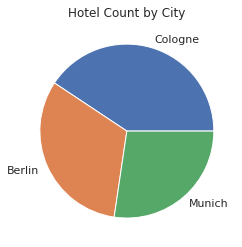

In [ ]:
plt.pie(data.City.value_counts().values, labels=data.City.value_counts().index)
plt.title('Hotel Count by City')
plt.show()

*Cologne* is *most popular* city for **hotel location**

As the heatmap shows, the bigger the square meter is appropriate the higher the price. (0.91)

There also seems to be positive correlations between profit generated with the price of the hotel, as well as the size of the hotel.

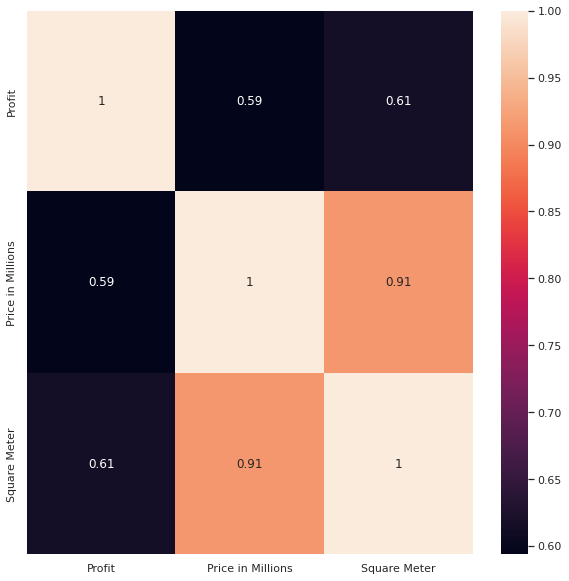

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot = True)

# Exploratory Data Analysis

Here **pairplot()** uses ***scatterplot()*** for each pairing of the variables and ***histplot()*** for the marginal plots along the diagonal:

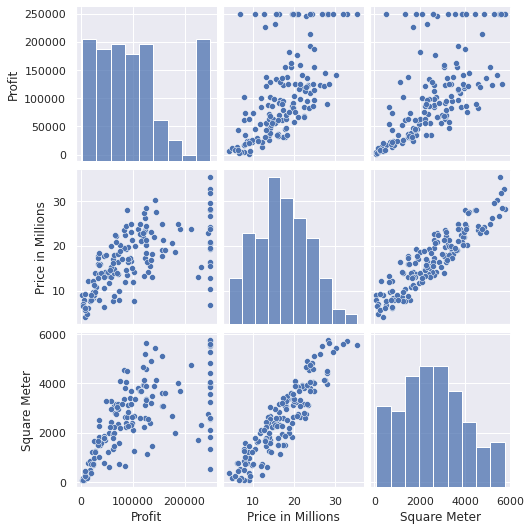

In [ ]:
sns.pairplot(data)

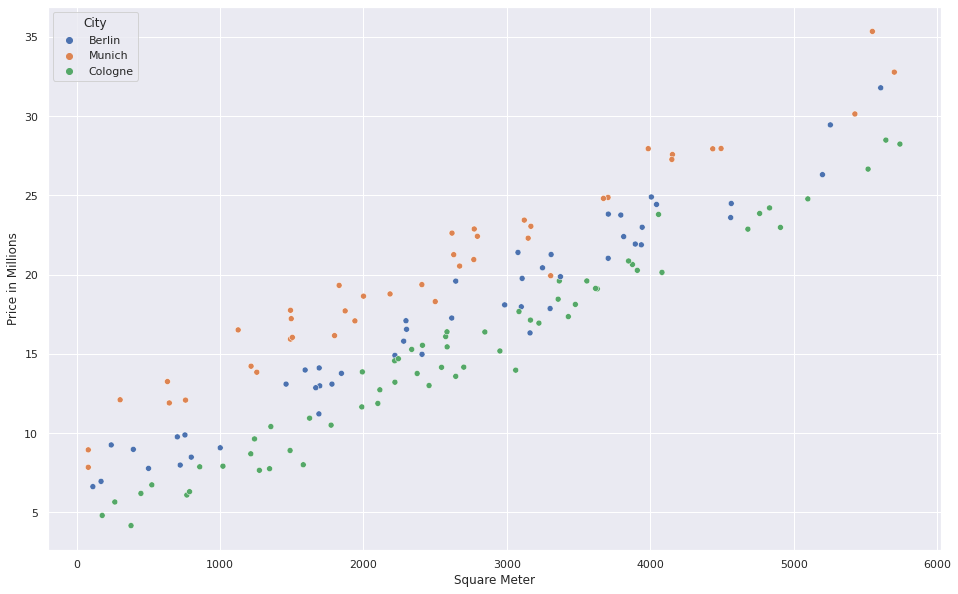

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(data = data, x='Square Meter', y='Price in Millions', hue='City' )

<Figure size 1008x1008 with 0 Axes>

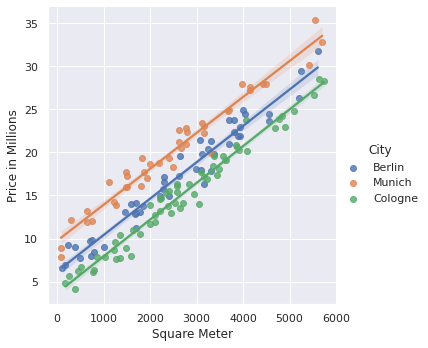

In [ ]:
plt.figure(figsize=(14,14))
sns.lmplot(data = data, x='Square Meter', y='Price in Millions', hue='City')

<Figure size 1008x1008 with 0 Axes>

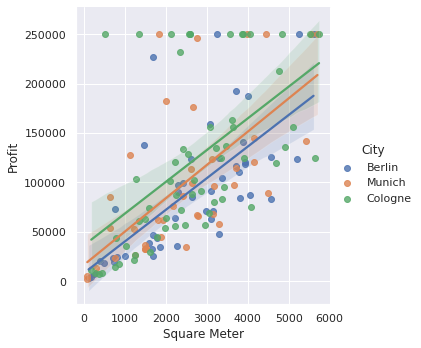

In [ ]:
plt.figure(figsize=(14,14))
sns.lmplot(data = data, x='Square Meter', y='Profit', hue='City')

<Figure size 1008x1008 with 0 Axes>

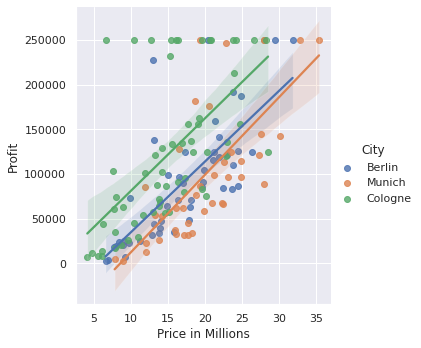

In [ ]:
plt.figure(figsize=(14,14))
sns.lmplot(data = data, x='Price in Millions', y='Profit', hue='City')

**We can see in general hotel in Munich is sold for higher price, followed by Berlin, and then Cologne (controlling for Square Meter size)**

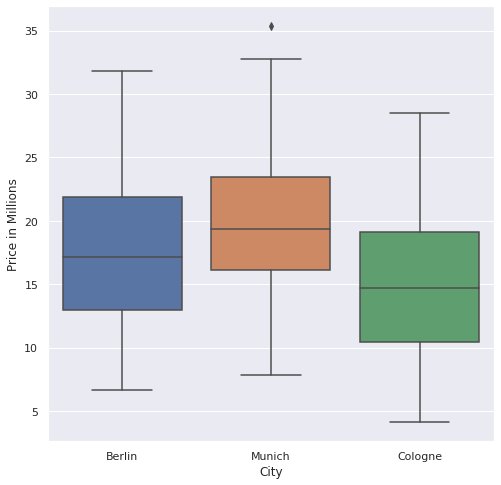

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(data = data, x='City', y='Price in Millions' )

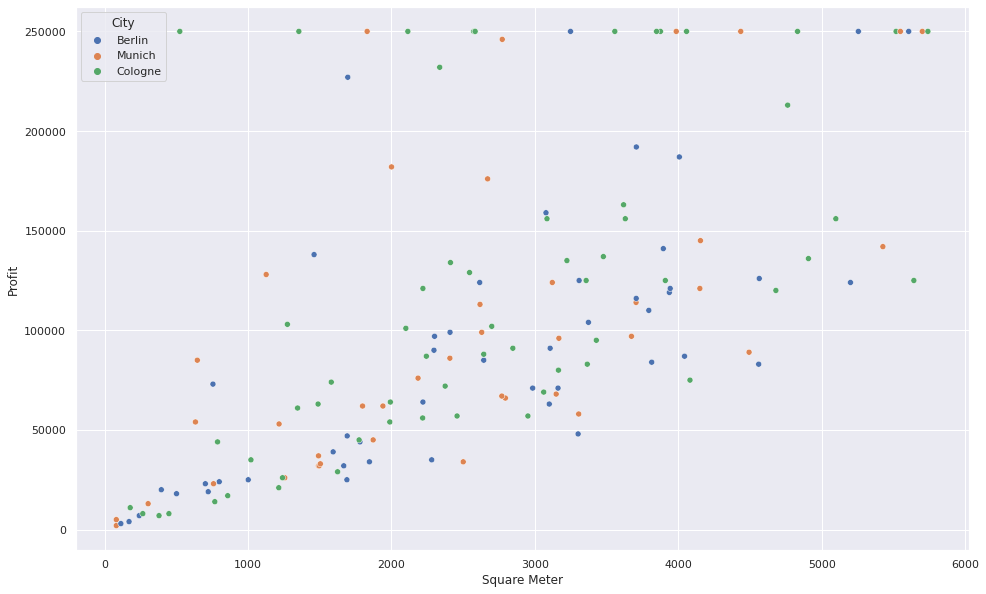

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(data = data, x='Square Meter', y='Profit', hue='City' )

Meanwhile, there is ***no clearcut pattern*** when it comes to role of city on profit. In general, the **higher the square meter**, **the higher is the profit**, and it applies to all cities

However we do notice a lot of outliers that stated they earn 250000 profit per year. We might want to remove them to get a better relational dataset, which we can use to better train our Machine Learning model later on.

Lets create 2 new columns: *Price per square meter*, and *Profit per square meter*

In [ ]:
data['Profit per Square Meter'] = data['Profit'] / data['Square Meter']
data['Price per Square Meter'] = (data['Price in Millions'] * 1000000 )/ data['Square Meter']
data.head()

,Profit,Price in Millions,Square Meter,City,Profit per Square Meter,Price per Square Meter
0,119000.0,21.88,3938.0,Berlin,30.218385,5556.119858
1,250000.0,27.95,3986.0,Munich,62.719518,7012.042148
2,250000.0,16.09,2574.0,Cologne,97.125097,6250.971251
3,145000.0,27.58,4155.0,Munich,34.897714,6637.785800
4,110000.0,23.76,3795.0,Berlin,28.985507,6260.869565


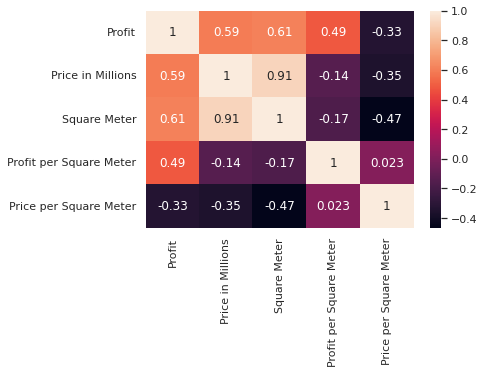

In [ ]:
sns.heatmap(data.corr(), annot = True)

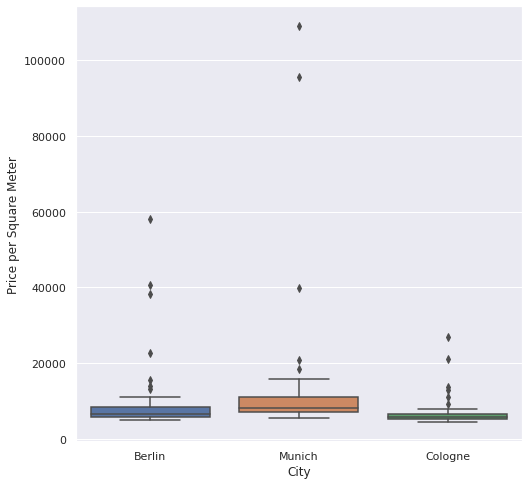

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(data = data, x='City', y='Price per Square Meter' )

Seems like there are a lot of ***outliers***. We can remove some of these values later on for our machine learning training dataset. We can set a simple filter, that if the Price per Square Meter is greater than 30000 Euro, it will be filtered out

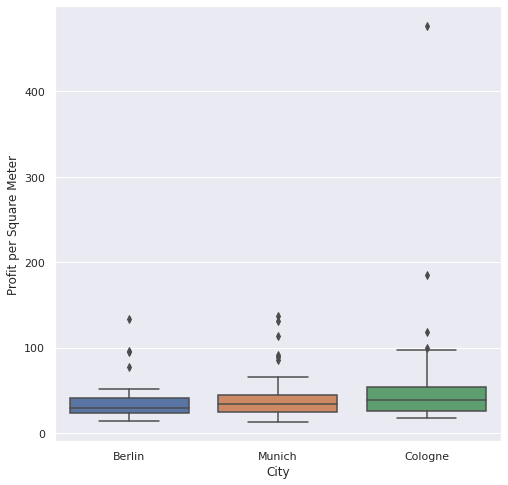

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(data = data, x='City', y='Profit per Square Meter' )

Likewise with Profit per Square meter, we can set a simple filter to weed out outliers. (eg: remove data with profit per square meter higher than 200)

# **Data Cleaning**

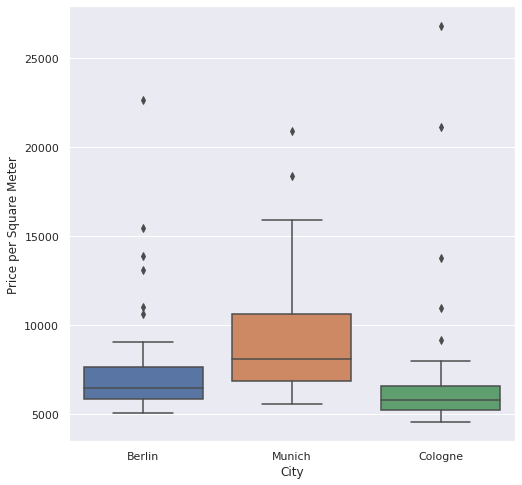

In [ ]:
data_clean = data[data['Price per Square Meter']<=30000]
data_clean = data_clean[data_clean['Profit per Square Meter'] <= 200]
plt.figure(figsize=(8,8))
sns.boxplot(data = data_clean, x='City', y='Price per Square Meter' )

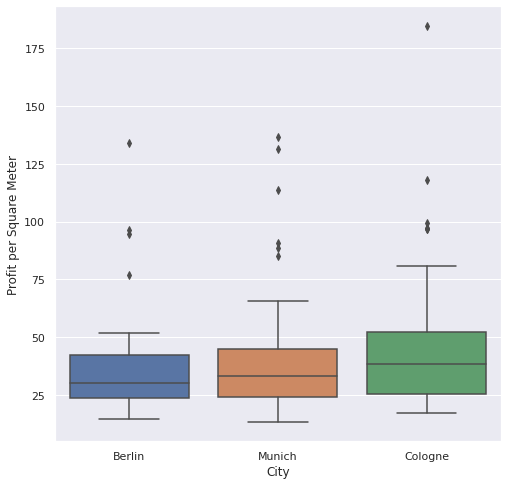

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(data = data_clean, x='City', y='Profit per Square Meter' )

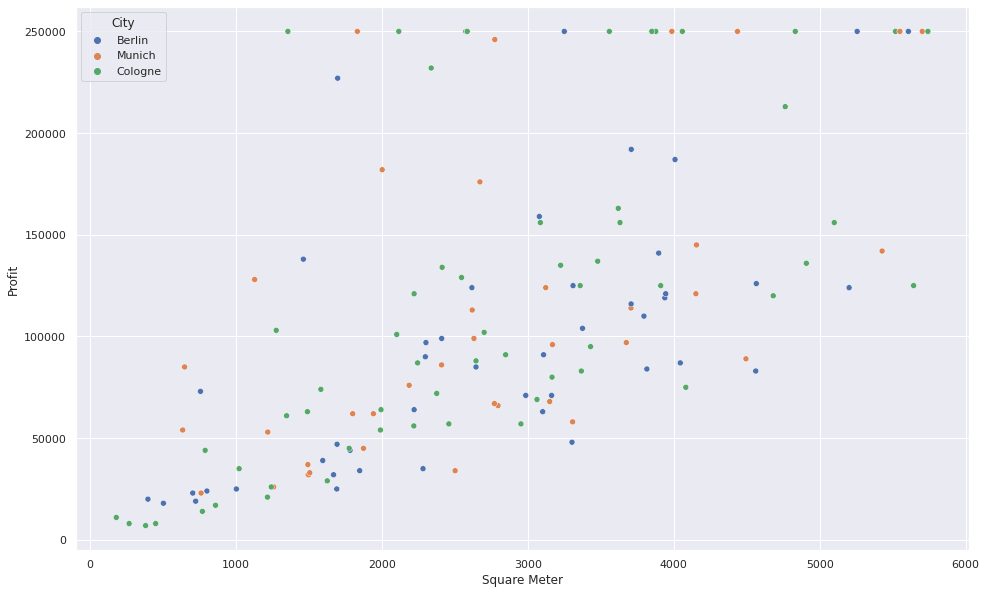

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(data = data_clean, x='Square Meter', y='Profit', hue='City' )

Now we are removing other hotels that stated exactly 250000 as their profit due to the questionable nature of the data rounding.

Notice many of the hotels stating itself as earning 250000 per year are located in Cologne

In [ ]:
data_clean = data_clean[data_clean['Profit'] != 250000]

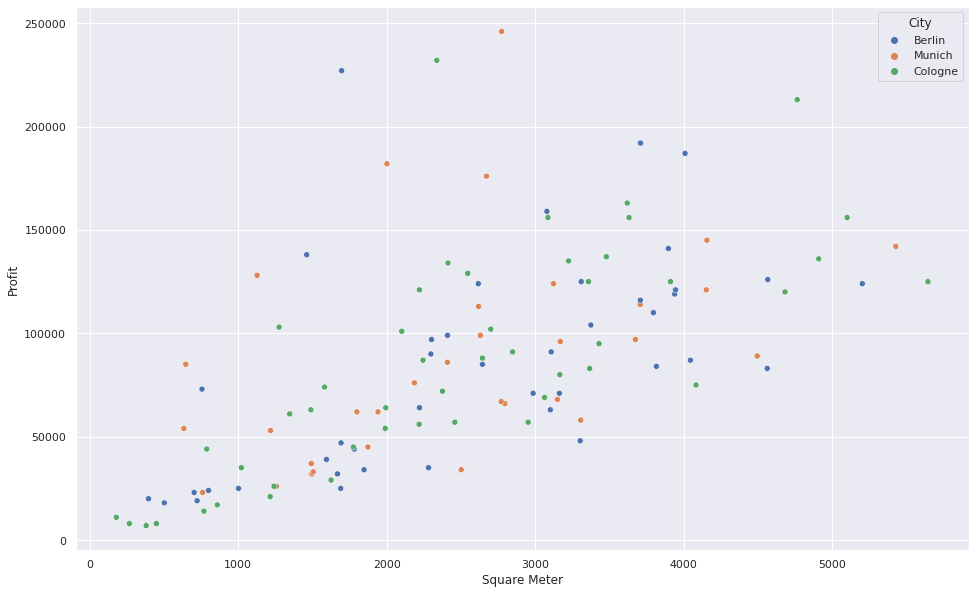

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(data = data_clean, x='Square Meter', y='Profit', hue='City' )

In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 0 to 149
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Profit                   123 non-null    float64
 1   Price in Millions        123 non-null    float64
 2   Square Meter             123 non-null    float64
 3   City                     123 non-null    object 
 4   Profit per Square Meter  123 non-null    float64
 5   Price per Square Meter   123 non-null    float64
dtypes: float64(5), object(1)
memory usage: 6.7+ KB


So we ended up removing **27 data points**, which is quite significant relative to the 150 original data points.

<Figure size 1152x720 with 0 Axes>

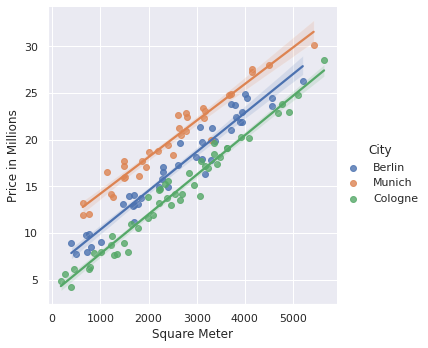

In [ ]:
plt.figure(figsize=(16,10))
sns.lmplot(data = data_clean, x='Square Meter', y='Price in Millions', hue='City')

<Figure size 1152x720 with 0 Axes>

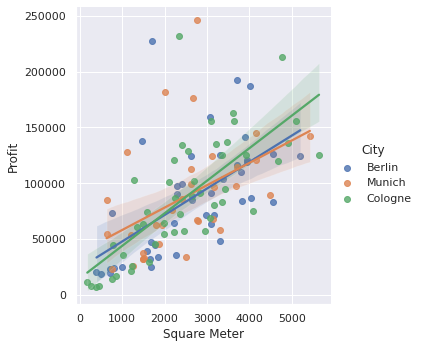

In [ ]:
plt.figure(figsize=(16,10))
sns.lmplot(data = data_clean, x='Square Meter', y='Profit', hue='City')

<Figure size 1152x720 with 0 Axes>

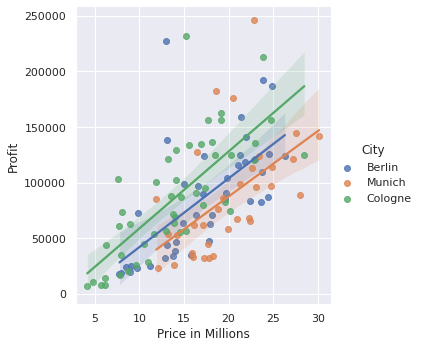

In [ ]:
plt.figure(figsize=(16,10))
sns.lmplot(data = data_clean, x='Price in Millions', y='Profit', hue='City')

As we can see, cities (categorical data) has strong influence on our data. We need to create dummy variables using the cleaned data

In [ ]:
data1=pd.get_dummies(data_clean, columns=["City"], prefix="in")

In [ ]:
data1.head()

,Profit,Price in Millions,Square Meter,Profit per Square Meter,Price per Square Meter,in_Berlin,in_Cologne,in_Munich
0,119000.0,21.88,3938.0,30.218385,5556.119858,1,0,0
3,145000.0,27.58,4155.0,34.897714,6637.785800,0,0,1
4,110000.0,23.76,3795.0,28.985507,6260.869565,1,0,0
5,246000.0,22.88,2773.0,88.712586,8250.991706,0,0,1
6,54000.0,13.25,634.0,85.173502,20899.053628,0,0,1


In [ ]:
hotel_profits=data1.copy()

# Linear Regression w/Standardization, Lasso or Ridge

In [ ]:
def profit_margin_n_years (profit, price, n):
    return ((profit*n)-price)/(profit*n)*100

def error(y_train_pred, y_test_pred):
    mse=[mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)]
    r2=[r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)]
    
    print(pd.DataFrame({"MSE": mse, "R2": r2}, index=['train', 'test']))


In [ ]:
X=hotel_profits.drop(columns="Price in Millions")
y=hotel_profits["Price in Millions"]

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.2, random_state=1)

In [ ]:
scaler=StandardScaler().fit(X_train)

In [ ]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
lin_model=LinearRegression().fit(X_train,y_train)

In [ ]:
y_test_pred=lin_model.predict(X_test)
y_train_pred=lin_model.predict(X_train)

In [ ]:
error(y_train_pred, y_test_pred)

            MSE        R2
train  0.951732  0.967339
test   1.303651  0.974606


In [ ]:
#alpha of .1
lasso_model=Lasso(alpha=.1).fit(X_train, y_train)

In [ ]:
y_train_pred=lasso_model.predict(X_train)
y_test_pred=lasso_model.predict(X_test)

In [ ]:
error(y_train_pred, y_test_pred)

            MSE        R2
train  1.135608  0.961029
test   1.543930  0.969925


In [ ]:
#alpha of .2
lasso_model=Lasso(alpha=.2).fit(X_train, y_train)

In [ ]:
y_train_pred=lasso_model.predict(X_train)
y_test_pred=lasso_model.predict(X_test)

In [ ]:
error(y_train_pred, y_test_pred)

            MSE        R2
train  1.220986  0.958099
test   1.797307  0.964990


In [ ]:
#alpha of .1
ridge_model=Ridge(alpha=.1).fit(X_train, y_train)

In [ ]:
y_train_pred=ridge_model.predict(X_train)
y_test_pred=ridge_model.predict(X_test)

In [ ]:
error(y_train_pred, y_test_pred)

            MSE        R2
train  0.951778  0.967337
test   1.308394  0.974513


In [ ]:
#alpha of .2
ridge_model=Ridge(alpha=.2).fit(X_train, y_train)

In [ ]:
y_train_pred=ridge_model.predict(X_train)
y_test_pred=ridge_model.predict(X_test)

In [ ]:
error(y_train_pred, y_test_pred)

            MSE        R2
train  0.951914  0.967333
test   1.313264  0.974419


Switch in alpha does not make as dramatic of a difference in Ridge method. Performs as well as the usual Linear Regression method.

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
reg = LassoCV(cv=10, random_state=0).fit(X_train, y_train)

In [ ]:
y_train_pred=reg.predict(X_train)
y_test_pred=reg.predict(X_test)

In [ ]:
error(y_train_pred, y_test_pred)

            MSE        R2
train  0.967743  0.966789
test   1.268751  0.975286


# **Decision Tree w/ Standardization**

In [ ]:
decision_tree_model=DecisionTreeRegressor(random_state=1).fit(X_train,y_train)

In [ ]:
y_train_pred=decision_tree_model.predict(X_train)
y_test_pred=decision_tree_model.predict(X_test)

In [ ]:
error(y_train_pred, y_test_pred)

            MSE        R2
train  0.000000  1.000000
test   3.055888  0.940473


Incredible level of overfitting on the training set. High levels of MSE but .9 R2 score.

# **XGBoost Regressor**

In [ ]:
xgboost_model=xg.XGBRegressor(random_state=1).fit(X_train,y_train)

[13:44:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_train_pred=xgboost_model.predict(X_train)
y_test_pred=xgboost_model.predict(X_test)

In [ ]:
error(y_train_pred, y_test_pred)

            MSE        R2
train  0.091546  0.996858
test   1.739651  0.966113


# **K Means (Standardized)**

In [ ]:
scaler=StandardScaler()
hotelprofits_scaled=scaler.fit_transform(hotel_profits)

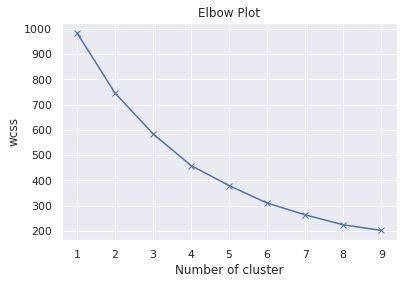

In [ ]:
# iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and 
# store the inertia value for that k 
wcss=[]
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=1).fit(hotelprofits_scaled)
    wcss.append(kmeans.inertia_)

#Elbow plot
plt.figure()
plt.title("Elbow Plot")
plt.plot(range(1,10), wcss, 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("wcss")
plt.show()

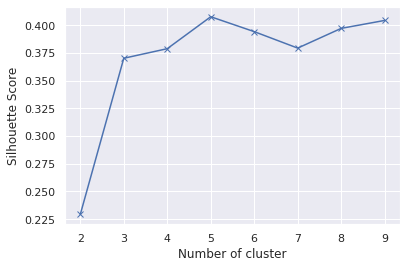

In [ ]:
sc=[]

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k 
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=1).fit(hotelprofits_scaled)
    labels = kmeans.predict(hotelprofits_scaled)
    sc.append(silhouette_score(hotelprofits_scaled, labels))

#Silhouette plot
plt.figure()
plt.plot(range(2,10), sc, 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

In [ ]:
#Kmeans pipeline
pipe=make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=1))
model=pipe.fit(hotel_profits)

In [ ]:
#labels each hotel with Kmeans cluster
hotel_profits['cluster']=model.predict(hotel_profits)

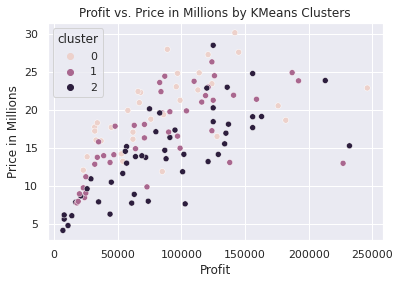

In [ ]:
plt.figure()
plt.title("Profit vs. Price in Millions by KMeans Clusters")
sns.scatterplot(data=hotel_profits, x="Profit", y="Price in Millions", hue="cluster")
plt.show()

Kmeans cluster looks a lot like the Profit vs Price in Millions by City scatterplot which makes sense (there are 3 cities in the dataset)

In [ ]:
#returns means and medians for each cluster
mean=hotel_profits.groupby('cluster').mean()
median=hotel_profits.groupby('cluster').median()
df_kmeans=pd.concat([mean,median], axis=0)
df_kmeans.index=['group0_mean', 'group1_mean', 'group2_mean', 'group0_median', 'group1_median', 'group2_median']
df_kmeans.T

,group0_mean,group1_mean,group2_mean,group0_median,group1_median,group2_median
Profit,87000.000000,85809.523810,86666.666667,76000.000000,84500.000000,81500.000000
Price in Millions,19.902727,17.077143,14.015625,19.370000,17.175000,14.060000
Square Meter,2452.909091,2611.404762,2474.937500,2501.000000,2630.000000,2393.500000
Profit per Square Meter,40.581338,35.720779,35.792027,30.303030,29.644351,31.966390
Price per Square Meter,9465.289641,7721.040686,6916.766604,8250.991706,6615.497711,5755.612775
in_Berlin,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
in_Cologne,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
in_Munich,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000


In [ ]:
for i in range(0,3):
    print("group ", str(i), " price/profit: ", round((df_kmeans.iloc[i]["Price in Millions"]*1000000)/(df_kmeans.iloc[i].Profit),2))

group  0  price/profit:  228.77
group  1  price/profit:  199.01
group  2  price/profit:  161.72


In [ ]:
for i in range(0,3):
    print("group ", str(i), " profit_margin: ", profit_margin_n_years(df_kmeans.iloc[i].Profit, df_kmeans.iloc[i]["Price in Millions"]*1000000,200))

group  0  profit_margin:  -14.38349007314525
group  1  profit_margin:  0.49389567147614893
group  2  profit_margin:  19.14062500000001


Based on Kmeans clustering where n=3, the model separates by city.

Group0 - Berlin, average annual profit=87,000, average price=19,902,727, price/profit=228.77

Group1 - Munich, average annual profit=85809.523810, average price=17,077,143, price/profit= 199.01

Group2 - Cologne, average annual profit=86666.666667, average price=14,015,625, price/profit=161.72

As the average prices of hotels in each city are ~170x the average annual profits (if every single variable is stable throughout the entirety of the hotel's operation which is highly unlikely but helpful for simple calculation i.e. cost of operation, property tax, profit, inflation, etc.), it will take ~170 years for an investment to break even.


Calculating profit margin in 200 years:


Group0 - Berlin, profit margin=-14.3834%

Group1 - Munich, profit margin=0.4938%

Group2 - Cologne, profit margin=19.14062%

Recommendation: Best hotel to invest in is in Cologne.

**Best model**

Best model overall for predicting hotel price in millions was the Ridge (alpha .2) regularized, Linear regression model. This makes sense as the Ridge method is best suited for predicting "dense" models where coefficients are all very small.

train

MSE: 0.951914, R2: 0.967333

test

MSE: 1.313264, R2: 0.974419
